In [7]:
import numpy as np
import matplotlib.pyplot as plt
from IsingFF import IsingFFSolver, load_schedule


In [8]:
fX, fZZ = load_schedule("./qa_schedule_230429.txt")

N=128  # chain length

solver = IsingFFSolver(N=N,
                       J=-1,
                       fX=fX,
                       fZZ=fZZ,
                       boundary='obc',
                       tau=7.0,
                       snapshots=[0, 1])

Diagonalizing initial Hamiltonian ...
Calculating evolution operators ...


In [10]:
# kink density in the middle of the chain at s=1.0
(1 - solver.measure_ZZnn(i=N//2, s=1.0)) / 2

0.11745966977939876

In [11]:
r=np.arange(0, 40)

Text(0, 0.5, '|FZZ(r, s=1, s=0)|')

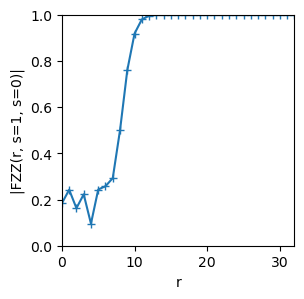

In [12]:
r0 = N // 4
rs = np.arange(0, N // 2)

FZZ = [solver.measure_ZZZZ(i1=r0+r, s1=1.0, i2=r0, s2=0.0, i3=r0+r, s3=1.0, i4=r0, s4=0.0) for r in rs]

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(3, 3)

ax.set_xlim(0, N // 4)
ax.set_ylim(0, 1)
ax.plot(rs, FZZ, marker='+')

ax.set_xlabel("r")
ax.set_ylabel("|FZZ(r, s=1, s=0)|")


In [13]:
# Now, for a few values of tau

fX, fZZ = load_schedule("./qa_schedule_230429.txt")
N=128  # chain length

FZZs = []
taus = [1, 2, 4, 8, 16, 32, 64]

for tau in taus:
    print(f"Calculating tau = {tau} ...")
    solver = IsingFFSolver(N=N,
                           J=-1,
                           fX=fX,
                           fZZ=fZZ,
                           boundary='obc',
                           tau=tau,
                           snapshots=[0, 1])
    r0 = N // 4
    rs = np.arange(0, N // 2)

    FZZs.append([solver.measure_ZZZZ(i1=r0+r, s1=1.0, i2=r0, s2=0.0, i3=r0+r, s3=1.0, i4=r0, s4=0.0) for r in rs])


Calculating tau = 1 ...
Diagonalizing initial Hamiltonian ...
Calculating evolution operators ...
Calculating tau = 2 ...
Diagonalizing initial Hamiltonian ...
Calculating evolution operators ...
Calculating tau = 4 ...
Diagonalizing initial Hamiltonian ...
Calculating evolution operators ...
Calculating tau = 8 ...
Diagonalizing initial Hamiltonian ...
Calculating evolution operators ...
Calculating tau = 16 ...
Diagonalizing initial Hamiltonian ...
Calculating evolution operators ...
Calculating tau = 32 ...
Diagonalizing initial Hamiltonian ...
Calculating evolution operators ...
Calculating tau = 64 ...
Diagonalizing initial Hamiltonian ...
Calculating evolution operators ...


Text(0, 0.5, '|<Z(r0+r, 1)Z(r0, 0)Z(r0+r, 1)Z(r0, 0)>|')

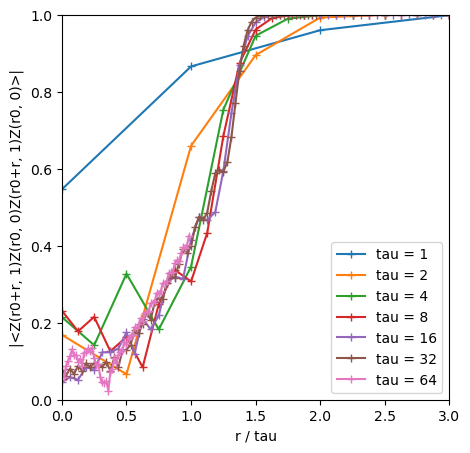

In [17]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5, 5)

ax.set_xlim(0, 3)
ax.set_ylim(0, 1)
for tau, fzz in zip(taus, FZZs):

    rstau = [x / tau for x in rs]
    ax.plot(rstau, fzz, label=f"tau = {tau}", marker = '+')

ax.legend()
ax.set_xlabel('r / tau')
ax.set_ylabel(f"|<Z(r0+r, 1)Z(r0, 0)Z(r0+r, 1)Z(r0, 0)>|")